<a href="https://colab.research.google.com/github/vekoada/tensorflow-course/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


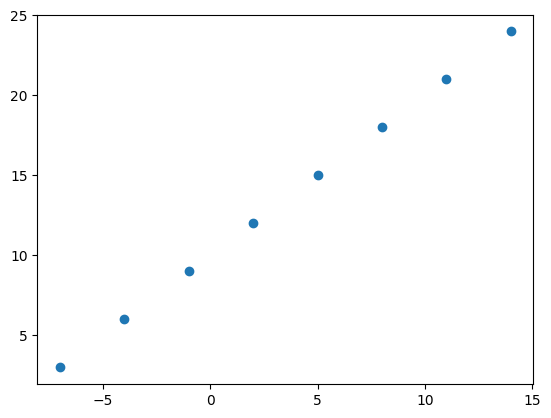

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#Labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#Visualize
plt.scatter(X, y)

In [ ]:
#Demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
(input_shape, output_shape)

(TensorShape([]), TensorShape([]))

In [ ]:
#Model building
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #"sgd"
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 953ms/step - loss: 9.1306 - mae: 9.1306
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 8.9981 - mae: 8.9981
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 8.8656 - mae: 8.8656
Epoch 4/5
1/1 [==============================] - 0s 14ms/step - loss: 8.7331 - mae: 8.7331
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 8.6006 - mae: 8.6006


In [ ]:
model.predict([17.0]) #still way off

1/1 [==============================] - 0s 178ms/step


array([[24.247894]], dtype=float32)

In [ ]:
#Improving our model through altering model components, compiling strategies, more data/time
#Let's code a new model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) #Changing epochs to see if it will improve

Epoch 1/100
1/1 [==============================] - 1s 563ms/step - loss: 19.2931 - mae: 19.2931
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 19.0119 - mae: 19.0119
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 18.7306 - mae: 18.7306
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 18.4494 - mae: 18.4494
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 18.1681 - mae: 18.1681
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 17.8869 - mae: 17.8869
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 17.6056 - mae: 17.6056
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 17.3244 - mae: 17.3244
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 17.0431 - mae: 17.0431
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 16.7619 - mae: 16.7619
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17.0]) #much better than before

1/1 [==============================] - 0s 111ms/step


array([[29.692717]], dtype=float32)

In [ ]:
#Keep everything the same but add a hidden layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 553ms/step - loss: 13.6088 - mae: 13.6088
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.9470 - mae: 12.9470
Epoch 3/100
1/1 [==============================] - 0s 20ms/step - loss: 12.2824 - mae: 12.2824
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6183 - mae: 11.6183
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.9408 - mae: 10.9408
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 10.2465 - mae: 10.2465
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 9.5268 - mae: 9.5268
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7874 - mae: 8.7874
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0180 - mae: 8.0180
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.2096 - mae: 7.2096
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
model.predict([17.0]) #MAE decreased but this particular didn't improve much

1/1 [==============================] - 0s 80ms/step


array([[32.476017]], dtype=float32)

In [ ]:
#Now other changes (normally it's best to change one variable at a time, not all)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=["mae"])
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.5496 - mae: 13.5496
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.7425 - mae: 12.7425
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.2429 - mae: 12.2429
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.7045 - mae: 11.7045
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 11.1311 - mae: 11.1311
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 10.5336 - mae: 10.5336
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 10.0253 - mae: 10.0253
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.4566 - mae: 9.4566
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.8115 - mae: 8.8115
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0854 - mae: 8.0854
Epoch 11/100
1/1 [==============================] - 0s 12

In [ ]:
model.predict([17.0, 20.0, 23.0])

1/1 [==============================] - 0s 113ms/step


array([[27.476954],
       [30.839792],
       [34.348804]], dtype=float32)

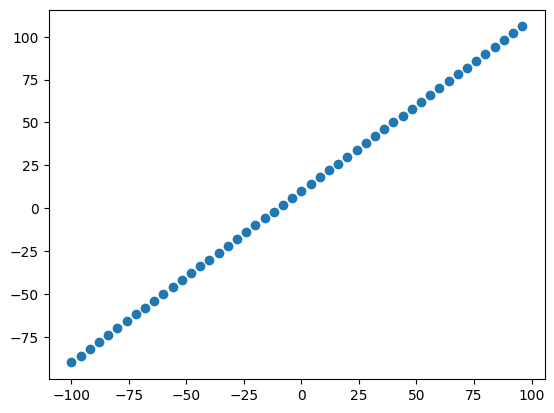

In [ ]:
#When it comes to evaluation, visualization is important
#Let's make a bigger dataset
X = tf.range(-100, 100, 4)
y = X + 10
plt.scatter(X, y)

In [ ]:
#Now let's split into train and test sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X.numpy(), y.numpy(), test_size=0.2)
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test) #converting back to tensors (sklearn required numpy for operation)


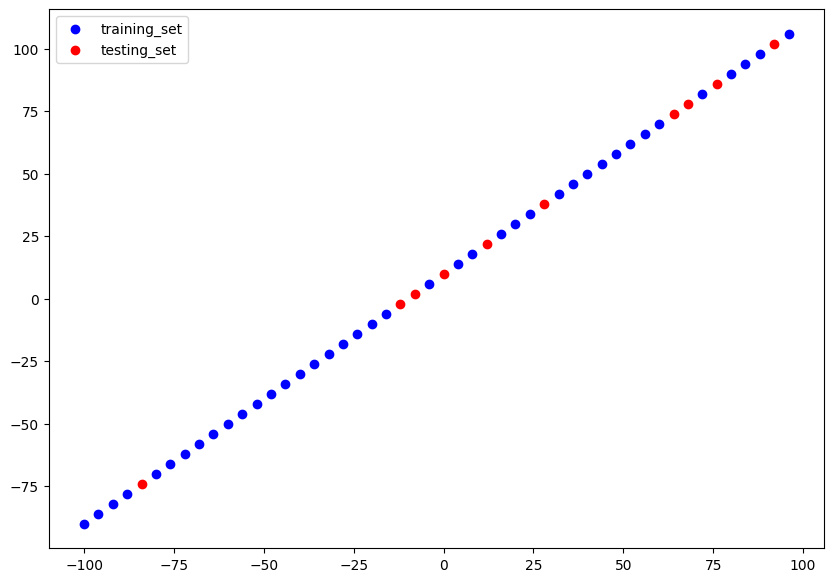

In [ ]:
plt.figure(figsize=(10, 7))
#Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='training_set')
plt.scatter(X_test, y_test, c='r', label='testing_set') #note that train_test_split also shuffles the data
plt.legend()

In [ ]:
#Now let's build the new model for this data
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100) #again, need to add dimension to X since that's what the function expects

In [ ]:
#Create a model which automatically build by defining the input_shape arg
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                20        
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) #0 verbose hides progress

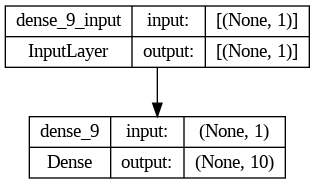

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [ ]:
# split into train and test sets
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X.numpy(), y.numpy(), test_size=0.2)
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test) #converting back to tensors (sklearn required numpy for operation)


In [ ]:
#build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics=["mae"])
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 48.5129 - mae: 48.5129
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 36.6004 - mae: 36.6004
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 27.6170 - mae: 27.6170
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 21.0803 - mae: 21.0803
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 19.9388 - mae: 19.9388
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 13.4866 - mae: 13.4866
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.3090 - mae: 8.3090
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 5.6649 - mae: 5.6649
Epoch 9/100
2/2 [==============================] - 0s 13ms/step - loss: 8.1698 - mae: 8.1698
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 9.1457 - mae: 9.1457
Epoch 11/100
2/2 [==============================] - 0s 11ms/st

In [ ]:
#Visualize model's predictions vs ground truth
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 88ms/step


array([[-18.950846 ],
       [ 54.13473  ],
       [-86.60599  ],
       [ 66.68455  ],
       [104.33398  ],
       [  3.8921895],
       [-43.02382  ],
       [-10.678875 ],
       [ 83.41761  ],
       [-50.96346  ]], dtype=float32)

In [ ]:
#create plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred
              ):
  """
  Plots training data, test data, compares predictions
  """
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training Data")
  plt.scatter(test_data,test_labels, c='g', label="Testing Data")
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  plt.legend()

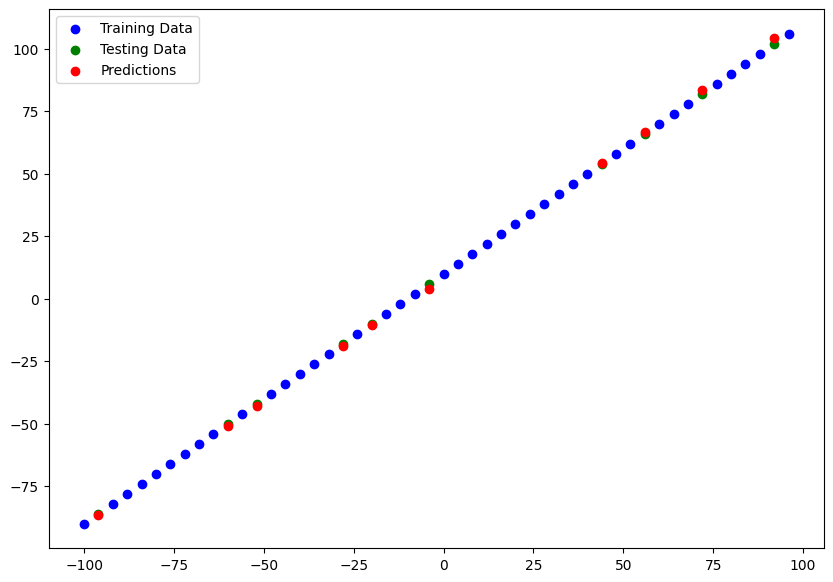

In [ ]:
plot_pred()

In [ ]:
#Evaluation
model.evaluate(X_test, y_test) #simple way

1/1 [==============================] - 0s 190ms/step - loss: 1.0902 - mae: 1.0902


[1.0901660919189453, 1.0901660919189453]

In [ ]:
#Through mean absolute error
def mae (y_true, y_pred):
  x = tf.keras.losses.MeanAbsoluteError()
  return x(y_test, tf.squeeze(y_pred)) #y_pred had an singleton dimension on axis=-1 and needed to be squeezed to match shape of y_test

mae(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0901663>

In [ ]:
#Through mean squared error
def mse (y_true, y_pred):
  x = tf.keras.losses.MeanSquaredError()
  return x(y_test, tf.squeeze(y_pred)) #y_pred had an singleton dimension on axis=-1 and needed to be squeezed to match shape of y_test

mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.6095346>

In [ ]:
#Through Huber metric
huber = tf.keras.losses.Huber()
huber(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.64568216>

In [ ]:
#Modeling experiments
#Experiment 1 - 1 model, 100 epochs
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 19.9280 - mae: 19.9280
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2161 - mae: 10.2161
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0140 - mae: 10.0140
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 9.9721 - mae: 9.9721
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 9.7205 - mae: 9.7205
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0553 - mae: 10.0553
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 13.1116 - mae: 13.1116
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.3061 - mae: 10.3061
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 9.8855 - mae: 9.8855
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 17.8393 - mae: 17.8393
Epoch 11/100
2/2 [==============================] - 0s 8ms/st

1/1 [==============================] - 0s 59ms/step


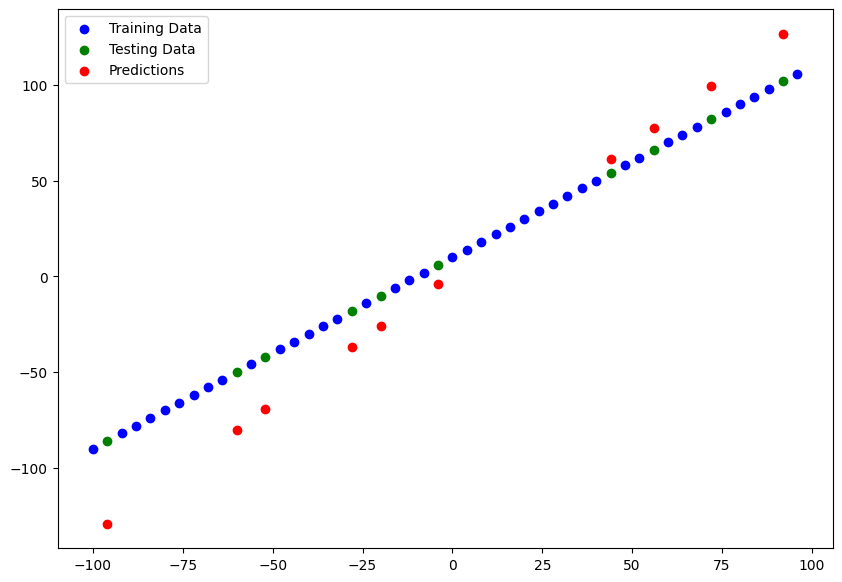

In [ ]:
#Making and plotting predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_pred(predictions=y_preds_1)

In [ ]:
# Calculate the eval metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=20.649628>,
 <tf.Tensor: shape=(), dtype=float32, numpy=533.2378>)

In [ ]:
#model_2 is 2 dense layers trained for 100 epochs
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mse'])
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 73.2626 - mse: 7915.6318
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 52.1103 - mse: 3941.1284
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 28.8297 - mse: 1166.4899
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 10.0019 - mse: 101.6610
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 13.2213 - mse: 281.8249
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 35.7090 - mse: 1670.9094
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 19.7153 - mse: 592.1240
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.8048 - mse: 116.0862
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 20.5695 - mse: 631.4293
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 10.0635 - mse: 120.3363
Epoch 11/100
2/2 [========================

1/1 [==============================] - 0s 104ms/step


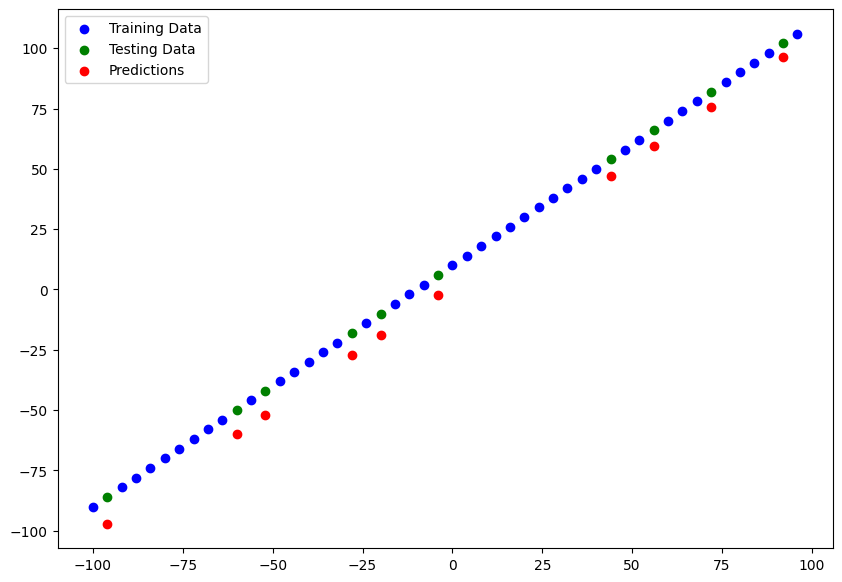

In [ ]:
#Predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_pred(predictions=y_preds_2)

In [ ]:
#Eval metrics for model_2
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=8.300957>,
 <tf.Tensor: shape=(), dtype=float32, numpy=71.94155>)

1/1 [==============================] - 0s 62ms/step


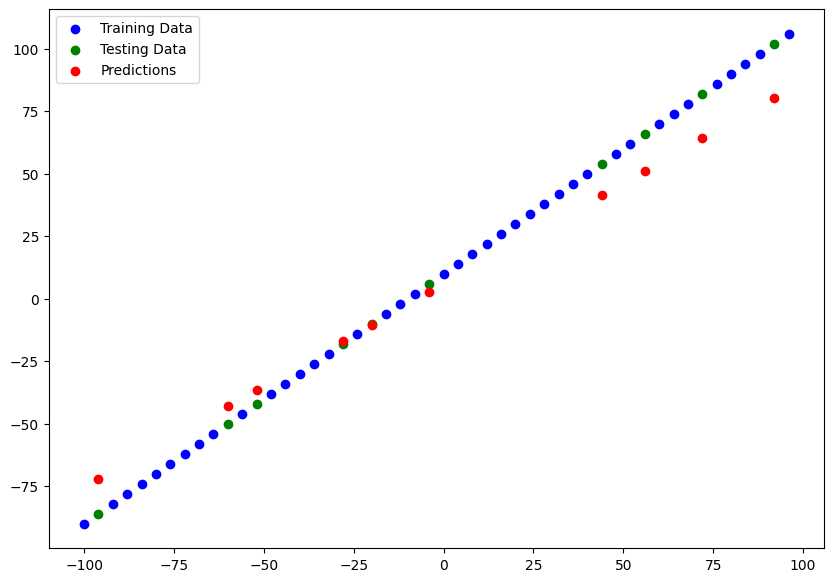

In [ ]:
#Building model 3 - 2 layers for 500 epochs
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

y_preds_3 = model_3.predict(X_test)
plot_pred(test_labels=y_test, predictions=y_preds_3)

In [ ]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=9.796745>,
 <tf.Tensor: shape=(), dtype=float32, numpy=143.66599>)

In [ ]:
#Comparing our models (remember to start experiments small)
import pandas as pd
model_results = [['model_1', mae_1.numpy(), mse_1.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,20.649628,533.237793
1,model_2,8.300957,71.941551
2,model_3,9.796745,143.665985


In [ ]:
#Saving our models to use outside of colab
model_2.save("ann_regression_best_model")

In [ ]:
#Another way to save (HDF5)
model_2.save("ann_regression_best_model.h5")

In [ ]:
#loading our saved model (SavedModel format) back into colab
ld_model_sm = tf.keras.models.load_model("ann_regression_best_model")
ld_model_sm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare loaded model's predictions (to test whether correctly saved)
model_2_preds = model_2.predict(X_test)
ld_model_sm_preds = ld_model_sm.predict(X_test)
ld_model_sm_preds == model_2_preds

1/1 [==============================] - 0s 111ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#Loading our saved model (hdf5 format)
lm_h5 = tf.keras.models.load_model("ann_regression_best_model.h5")
lm_h5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                20        
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Compare predictions
model_2_preds = model_2.predict(X_test)
lm_h5_preds = lm_h5.predict(X_test)
lm_h5_preds == model_2_preds

1/1 [==============================] - 0s 61ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])